In [18]:
#Code provided by Jonathan Juarez

import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from common_words import clean_tweet

df_tweets = pd.read_csv('../sources/merged_twitter_text_county.csv')

def word_cloud(data, stance, year):
    """
    Function that generates word clouds given a pandas data frame.
    Inputs: stance- A string value that can be either "believer", "denier", or "neutral"
            year- integer value that can be between 2009 - 2019
    Output: a plt image and a png file that is saved in the repo
    """
    df = data[(data["stance"] == stance) & (df_tweets["fyDeclared"] == year)]

    tweets_list = df["content"].to_numpy()

    cleaned_tweets = [clean_tweet(tw) for tw in tweets_list]

    #Join element strings of tweets list into one long string
    text = " ".join(cleaned_tweets)

    stopwords = set(STOPWORDS)
    stopwords.update(["said", "u", "know", "make", "thing", "much", "want", "say", "will",
                "re", "come", "going", "doesn", 'goparkansas', 'don', 'nal',
                "see", "via", "amp", "wait", 'almost', 'im', 'wouldn', 'climate', 'global',
                'met', 'gala', 'u2066', 'u2069', 'dakota'])  # add additional stop words as needed

    # Create and generate a word cloud image:
    if stance == "neutral":
        color = 'gray_r'
    elif stance == "believer":
        color = 'summer_r'
    elif stance == "denier":
        color = 'inferno_r'

    wordcloud = WordCloud(width=600, height=400, max_words=40, background_color= "white",\
     stopwords=stopwords, collocations = True, colormap= color).generate(text)

    # # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.show()

    #this saves the wordcloud generated into an image file
    plt.savefig(f'new_wordcloud_{stance}_{year}.png')
    plt.show()


In [20]:
def word_cloud_incident(data, incident, year):
    """
    Function that generates word clouds given a pandas data frame.
    Inputs:
            year- integer value that can be between 2009 - 2019
            incident - a string value that can be either "fire", "hurricane", "flood", "tornado",
                        "snowstorm", "severe storm"
    Output: a plt image and a png file that is saved in the repo
    """
    df = data[(data['incidentType'] == incident) & (df_tweets["fyDeclared"] == year)]

    tweets_list = df["content"].to_numpy()

    cleaned_tweets = [clean_tweet(tw) for tw in tweets_list]

    #Join element strings of tweets list into one long string
    text = " ".join(cleaned_tweets)

    stopwords = set(STOPWORDS)
    stopwords.update(["said", "u", "know", "make", "thing", "much", "want", "say", "will",
                "re", "come", "going", "doesn", 'goparkansas', 'don', 'nal',
                "see", "via", "amp", "wait", 'almost', 'im', 'wouldn', 'u2066', 'u2069',
                'dakota'])  # add additional stop words as needed

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=600, height=400, max_words=40, background_color='white', stopwords=stopwords, collocations = True).generate(text)

    # # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.show()

    #this saves the wordcloud generated into an image file
    plt.savefig(f'new_wordcloud_{incident}_{year}.png')
    plt.show()

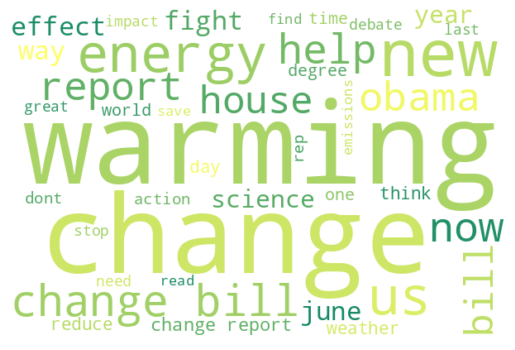

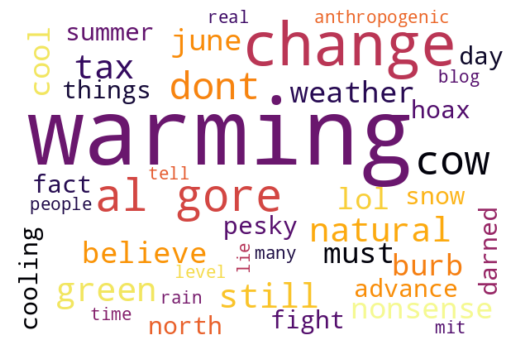

In [19]:
word_cloud(df_tweets, "believer", 2009)
word_cloud(df_tweets, "denier", 2009)

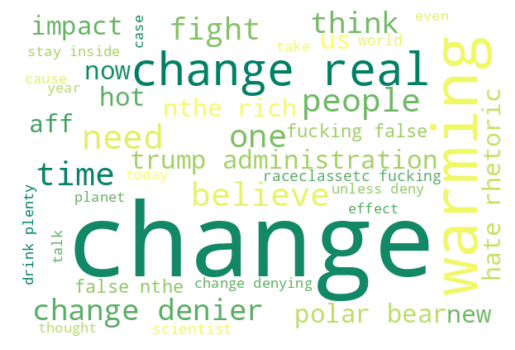

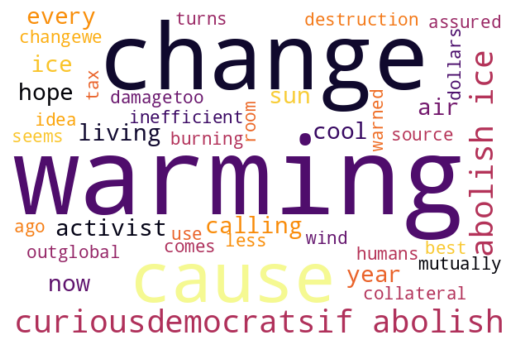

In [20]:
word_cloud(df_tweets, "believer", 2018)
word_cloud(df_tweets, "denier", 2018)

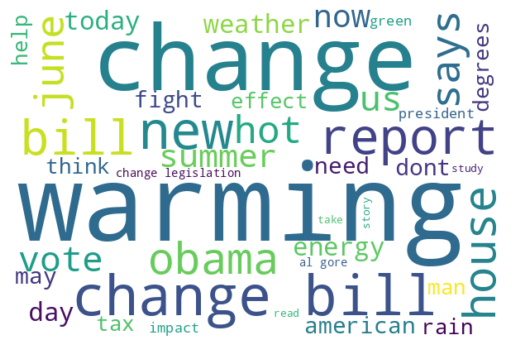

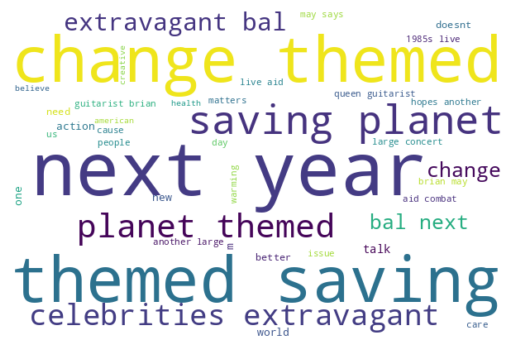

In [12]:
word_cloud(df_tweets, "neutral", 2009)
word_cloud(df_tweets, "neutral", 2018)